# ***Entrega 1: Obtención de insights a partir de visualizaciones***

## **Índice de contenidos**

1. Introducción  
2. Hipótesis y preguntas clave del análisis  
3. Configuración del entorno y carga de datos  
4. Data Wrangling – Limpieza y transformación de datos  
   4.1 Valores duplicados  
   4.2 Valores nulos  
   4.3 Tratamiento de outliers  
   4.4 Otras transformaciones: fechas, nuevas columnas  
   4.5 Normalización de datos  
   4.6 Redefinición de nombres de columnas  
5. Análisis Exploratorio de Datos (EDA)  
   5.1 Análisis Univariado: Estacionalidad de las temperaturas extremas: máxima y mínima  
   5.2 Análisis Bivariado: Relación entre temperaturas extremas y otras variables climáticas  
   5.3 Análisis derivado de una sola variable y bivariado: Amplitud térmica  
   5.4 Análisis Univariado: Eventos térmicos extremos y su recurrencia  
   5.5 Análisis Multivariado: Estacionalidad térmica  
6. Conclusión global del estudio  







## **1 - Introducción: Análisis Climático Aplicado a la Planificación Comercial en Retail**

El confort térmico de los consumidores influye directamente en su comportamiento de compra. En el contexto del retail de electrodomésticos y productos para el hogar, los cambios de temperatura generan incrementos abruptos en la demanda de productos como ventiladores, estufas, aires acondicionados o climatizadores portátiles.

Este proyecto busca anticipar **picos de frío o calor** mediante el análisis de datos meteorológicos obtenidos desde una API pública, con foco en **San Miguel de Tucumán**, una plaza estratégica para **Oscar Barbieri S.A.**. La información recolectada será transformada, explorada y visualizada para generar insights útiles para la toma de decisiones comerciales. En una segunda etapa, se avanzará en la construcción de modelos predictivos que permitan automatizar el pronóstico térmico y apoyar la planificación operativa.

---


### 👥 Audiencia Objetivo

Este análisis está dirigido a tres perfiles clave dentro de Oscar Barbieri S.A.:

- **Dirección General y Gerencia Comercial**  
  Para diseñar estrategias de exhibición, abastecimiento y promociones en función del clima.

- **Mandos Medios y Responsables de Sucursal**  
  Para ajustar acciones tácticas, reforzar inventario local y prevenir quiebres de stock.

- **Analistas de Datos y Business Intelligence**  
  Para integrar variables climáticas en dashboards, proyecciones y modelos de demanda.

---

### 🏢 Contexto Comercial

Oscar Barbieri S.A. es una empresa de retail con fuerte presencia en el noroeste argentino. Durante los cambios estacionales, las ventas de productos de climatización presentan un comportamiento fuertemente influenciado por el clima local. Picos inesperados de frío o calor generan **saltos abruptos en la demanda**, lo que puede derivar en faltantes de stock, oportunidades de venta desaprovechadas o sobrecostos logísticos por urgencias de reposición.

Anticipar estas variaciones térmicas permitiría:

- Aumentar la **eficiencia operativa y logística** en la cadena de suministro.
- Mejorar la **precisión de campañas de marketing estacional**.
- **Maximizar ventas** en días críticos con decisiones comerciales proactivas.

---

### 📈 Contexto Analítico

Desde una perspectiva de ciencia de datos, el proyecto se sustenta en los siguientes pilares:

- **Adquisición de datos históricos** a través de la API pública de Open-Meteo, sin necesidad de autenticación.
- **Construcción de un dataset estructurado** con más de 2000 filas y al menos 15 columnas.
- Aplicación de técnicas de:
  - Limpieza de datos (Data Wrangling),
  - Análisis exploratorio (EDA),
  - Visualización y Data Storytelling,
  - Preparación de variables para futuros modelos de Machine Learning supervisado.

Este trabajo sigue una lógica reproducible, escalable y alineada con metodologías modernas de análisis de datos.

---

### 🎯 Objetivo del Proyecto

**Objetivo general:**  
Desarrollar un sistema de análisis y predicción térmica que permita anticipar eventos extremos de temperatura en zonas comerciales clave, con el fin de optimizar la planificación de ventas de productos de climatización.

**Objetivos específicos:**

- Importar y estructurar datos meteorológicos desde una API pública
- Limpiar, transformar y enriquecer el dataset para análisis
- Detectar picos de temperatura (frío o calor) de forma automatizada
- Visualizar insights térmicos útiles para la toma de decisiones comerciales
- Generar la base analítica para un futuro modelo de pronóstico con Machine Learning

---

### 🔗 Dataset

**Fuente de los datos:**  
Se utilizará la **API pública de Open-Meteo** (https://open-meteo.com/), que permite acceder de forma gratuita y sin autenticación a datos meteorológicos históricos de alta calidad. Esta API fue seleccionada por su accesibilidad, cobertura global, disponibilidad de dato.

**Características del dataset:**

- **Ubicación geográfica**: San Miguel de Tucumán, Argentina (`lat=-26.8241`, `lon=-65.2226`)
- **Frecuencia temporal**: Datos **diarios** (una fila por día)
- **Período histórico considerado**: Del **1 de enero de 2005 al 31 de julio de 2025** (20 años aproximadamente)
- **Tamaño estimado del dataset**: Aprox. **7.300 registros aproximadamente** (365 días × 20 años)
- **Variables incluidas**:
  - `temperature_2m_max`: Temperatura máxima diaria (°C)
  - `temperature_2m_min`: Temperatura mínima diaria (°C)
  - `precipitation_sum`: Precipitación total diaria (mm)
  - `windspeed_10m_max`: Velocidad máxima del viento (km/h)
  - `relative_humidity_2m_min`: Humedad relativa mínima (%)
  - `shortwave_radiation_sum`: Radiación solar (MJ/m²)
  - Y otras variables disponibles según configuración
- **Formato de los datos**:
  - Datos obtenidos en **JSON**
  - Convertidos a **DataFrame de Pandas**
  - Exportados como CSV (`clima_tucuman_diario.csv`) para asegurar reproducibilidad y uso offline

---

Este proyecto representa la convergencia entre la analítica de datos y la estrategia comercial. A través del uso de datos abiertos y herramientas de análisis, se busca transformar variables meteorológicas en **insights accionables** que contribuyan a la eficiencia operativa de una empresa de retail.

El resultado será una base sólida de información y visualizaciones que no solo ayudan a entender el clima del pasado reciente, sino también a **prepararse proactivamente ante los comportamientos futuros del mercado**.


## **2 - Hipótesis y preguntas clave del análisis**

El análisis meteorológico propuesto busca anticipar condiciones climáticas extremas que puedan afectar la demanda de productos de climatización en el retail. Para ello, formulamos una serie de **hipótesis orientadas a extraer insights útiles** para la planificación comercial en Oscar Barbieri S.A.

Las siguientes preguntas guían el análisis exploratorio y la posterior aplicación de modelos de predicción:


### 🧠 Hipótesis 1: La temperatura máxima y mínima diaria presenta un patrón estacional claro  
**Pregunta asociada:** ¿Qué meses concentran las temperaturas más altas y más bajas del año?

Se espera que las temperaturas extremas sigan una lógica estacional, permitiendo anticipar con antelación los períodos de mayor demanda de productos fríos o calefactores.

---

### 🧠 Hipótesis 2: Los extremos térmicos diarios se relacionan con otras variables climáticas  
**Pregunta asociada:** ¿Qué condiciones acompañan los días más fríos o calurosos (humedad, nubosidad, viento, etc.)?

La correlación entre variables meteorológicas permitiría construir un modelo más robusto que anticipe sensaciones térmicas extremas incluso si la temperatura por sí sola no basta.

---

### 🧠 Hipótesis 3: Existen días con alta amplitud térmica que generan demanda dual (frío y calor)  
**Pregunta asociada:** ¿Qué días muestran la mayor diferencia entre temperatura mínima y máxima?

Una amplitud elevada en una misma jornada puede impulsar la venta de productos de doble función o ajuste térmico rápido (aires inverter, caloventores, etc.).

---

### 🧠 Hipótesis 4: Es posible detectar eventos térmicos extremos mediante patrones históricos  
**Pregunta asociada:** ¿Con qué frecuencia se superan umbrales críticos de temperatura (>30 °C o <5 °C)? ¿Se repiten en ciertos períodos?

Validar esta hipótesis es clave para proyectar un modelo de predicción de picos térmicos que anticipe cambios de comportamiento en la demanda.

---

### 🧠 Hipótesis 5: El clima en San Miguel de Tucumán exhibe comportamientos estacionales estables a lo largo del tiempo, caracterizados por combinaciones de variables climáticas que se repiten año a año  
**Pregunta asociada:** ¿Existen patrones multivariados estacionales —combinaciones típicas de temperatura, humedad, presión, radiación solar, etc.— que se repiten en ciertos meses o estaciones?

Detectar regularidades estacionales permitiría a la empresa anticiparse con mayor precisión a la demanda de productos de climatización, alineando el calendario promocional con el clima real.

---

Estas hipótesis guían el análisis exploratorio que se desarrollará en los próximos apartados. Además, servirán de base para un modelo de Machine Learning orientado a la predicción anticipada de condiciones climáticas críticas para el negocio..

## **3.  Configuración del entorno y carga de datos**

Antes de comenzar con el análisis exploratorio, debemos obtener los datos desde su fuente original.

Para ello utilizamos la API pública de **Open-Meteo**, que permite acceder gratuitamente a datos históricos meteorológicos, sin necesidad de autenticación.

A continuación:

1. Se define la ubicación geográfica de San Miguel de Tucumán.
2. Se realiza una solicitud a la API para obtener **datos diarios históricos** desde el 1 de enero de 2005 hasta el 31 de julio de 2025.
3. Se transforman los datos obtenidos en un DataFrame de Pandas.
4. Se guarda el archivo local en formato `.csv` para garantizar la reproducibilidad del análisis.


In [ ]:
# Instalar dependencias recomendadas por Open-Meteo
!pip install openmeteo-requests requests-cache retry-requests numpy pandas --quiet
!pip install missingno --quiet

import openmeteo_requests
import pandas as pd
import requests_cache
from retry_requests import retry
import seaborn as sns
import matplotlib.pyplot as plt

# Setup del cliente con cache y reintento automático
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Coordenadas de San Miguel de Tucumán
latitude = -26.8167
longitude = -65.2167

# Fechas de inicio y fin (pueden ir por partes si da timeout)
start_date = "2005-01-01"
end_date = "2025-07-31"

# Variables a solicitar (solo algunas claves para el análisis, podés agregar más)
variables = [
    "temperature_2m_min", "temperature_2m_max", "temperature_2m_mean",
    "apparent_temperature_min", "apparent_temperature_max", "apparent_temperature_mean",
    "precipitation_sum", "rain_sum", "snowfall_sum",
    "wind_speed_10m_max", "wind_gusts_10m_max",
    "pressure_msl_mean", "cloud_cover_mean", "relative_humidity_2m_mean",
    "sunshine_duration"
]

params = {
    "latitude": latitude,
    "longitude": longitude,
    "start_date": start_date,
    "end_date": end_date,
    "daily": variables,
    "timezone": "America/Argentina/Salta"
}



In [ ]:
# Llamada a la API
response = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)[0]

# Extraer timestamps
time_index = pd.date_range(
    start=pd.to_datetime(response.Daily().Time(), unit="s", utc=True),
    end=pd.to_datetime(response.Daily().TimeEnd(), unit="s", utc=True),
    freq=pd.Timedelta(seconds=response.Daily().Interval()),
    inclusive="left"
)

# Crear diccionario de datos
daily_data = {"date": time_index}
for i, var in enumerate(variables):
    daily_data[var] = response.Daily().Variables(i).ValuesAsNumpy()

# Crear DataFrame
df = pd.DataFrame(daily_data)

# Mostrar forma y primeras filas
print("✅ Datos descargados:", df.shape)
df.head()


✅ Datos descargados: (7517, 16)


,date,temperature_2m_min,temperature_2m_max,temperature_2m_mean,apparent_temperature_min,apparent_temperature_max,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,pressure_msl_mean,cloud_cover_mean,relative_humidity_2m_mean,sunshine_duration
0,2005-01-01 03:00:00+00:00,20.950001,26.549999,23.697916,24.049232,32.402000,27.784178,22.4,22.4,0.0,10.829958,31.680000,1009.466614,85.416664,89.052269,44869.441406
1,2005-01-02 03:00:00+00:00,20.200001,27.850000,23.812502,23.075848,33.181248,27.456598,6.4,6.4,0.0,11.928989,26.639999,1011.470947,59.666668,84.176224,42366.019531
2,2005-01-03 03:00:00+00:00,18.150000,31.450001,24.949997,20.447903,37.370834,29.105316,0.0,0.0,0.0,8.121970,20.519999,1006.666687,13.375000,79.115547,46433.746094
3,2005-01-04 03:00:00+00:00,20.299999,34.099998,26.668747,22.878204,37.819969,30.214415,0.0,0.0,0.0,17.068707,33.119999,1004.299988,13.625000,73.082924,46447.117188
4,2005-01-05 03:00:00+00:00,22.150000,34.500000,28.343750,23.978689,39.006580,31.361780,0.0,0.0,0.0,16.375053,33.839996,1002.620911,40.166668,65.190529,46459.039062


In [ ]:
# Exportar como CSV
df.to_csv("clima_tucuman_historico.csv", index=False)
print("📁 Archivo guardado como clima_tucuman_historico.csv")


📁 Archivo guardado como clima_tucuman_historico.csv


In [ ]:
# Info general
print("📌 Información general del DataFrame:")
df.info()

# Cantidad de filas y columnas
print(f"\n🔢 Dimensión del DataFrame: {df.shape[0]} filas x {df.shape[1]} columnas")

# Estadísticas descriptivas
print("\n📈 Estadísticas generales:")
display(df.describe().T)



📌 Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7517 entries, 0 to 7516
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   date                       7517 non-null   datetime64[ns, UTC]
 1   temperature_2m_min         7517 non-null   float32            
 2   temperature_2m_max         7517 non-null   float32            
 3   temperature_2m_mean        7517 non-null   float32            
 4   apparent_temperature_min   7517 non-null   float32            
 5   apparent_temperature_max   7517 non-null   float32            
 6   apparent_temperature_mean  7517 non-null   float32            
 7   precipitation_sum          7517 non-null   float32            
 8   rain_sum                   7517 non-null   float32            
 9   snowfall_sum               7517 non-null   float32            
 10  wind_speed_10m_max         7517 non

,count,mean,std,min,25%,50%,75%,max
temperature_2m_min,7517.0,14.204000,5.451658,-6.400000,10.000000,14.900000,18.822498,25.872499
temperature_2m_max,7517.0,24.253899,5.914788,2.800000,20.072498,24.372499,28.622499,41.872498
temperature_2m_mean,7517.0,18.923243,5.320154,-0.043750,14.889164,19.320833,23.012083,33.480827
apparent_temperature_min,7517.0,14.207634,7.226606,-10.869534,8.446041,14.738008,20.315384,29.484657
apparent_temperature_max,7517.0,25.392029,7.798496,-1.112530,19.574261,25.573336,31.479557,44.729881
apparent_temperature_mean,7517.0,19.497248,7.108181,-3.806857,14.030811,20.031521,25.270264,35.740807
precipitation_sum,7517.0,2.917667,7.930057,0.000000,0.000000,0.000000,1.600000,121.099991
rain_sum,7517.0,2.917653,7.930052,0.000000,0.000000,0.000000,1.600000,121.099991
snowfall_sum,7517.0,0.000009,0.000807,0.000000,0.000000,0.000000,0.000000,0.070000
wind_speed_10m_max,7517.0,12.693456,4.587330,4.334974,9.422101,11.726277,15.038350,45.258457


## **4 - Data Wrangling - Limpieza y transformación de datos**

En esta sección se realiza la limpieza y preparación del dataset para asegurar su calidad antes del análisis exploratorio. Las tareas incluyen la detección de duplicados, valores nulos, outliers y transformaciones útiles como la extracción de componentes temporales o la normalización si es necesaria.

---


### **4.1 - Valores duplicados**

In [ ]:
# Verificación de duplicados
duplicados = df.duplicated().sum()
print(f"🔁 Filas duplicadas: {duplicados}")

# Si hubiera duplicados, se podrían eliminar así:
# df = df.drop_duplicates()


🔁 Filas duplicadas: 0


### **4.2 - Valores nulos**

🔍 Valores nulos por columna:
date                         0
temperature_2m_min           0
temperature_2m_max           0
temperature_2m_mean          0
apparent_temperature_min     0
apparent_temperature_max     0
apparent_temperature_mean    0
precipitation_sum            0
rain_sum                     0
snowfall_sum                 0
wind_speed_10m_max           0
wind_gusts_10m_max           0
pressure_msl_mean            0
cloud_cover_mean             0
relative_humidity_2m_mean    0
sunshine_duration            0
dtype: int64


<Axes: >

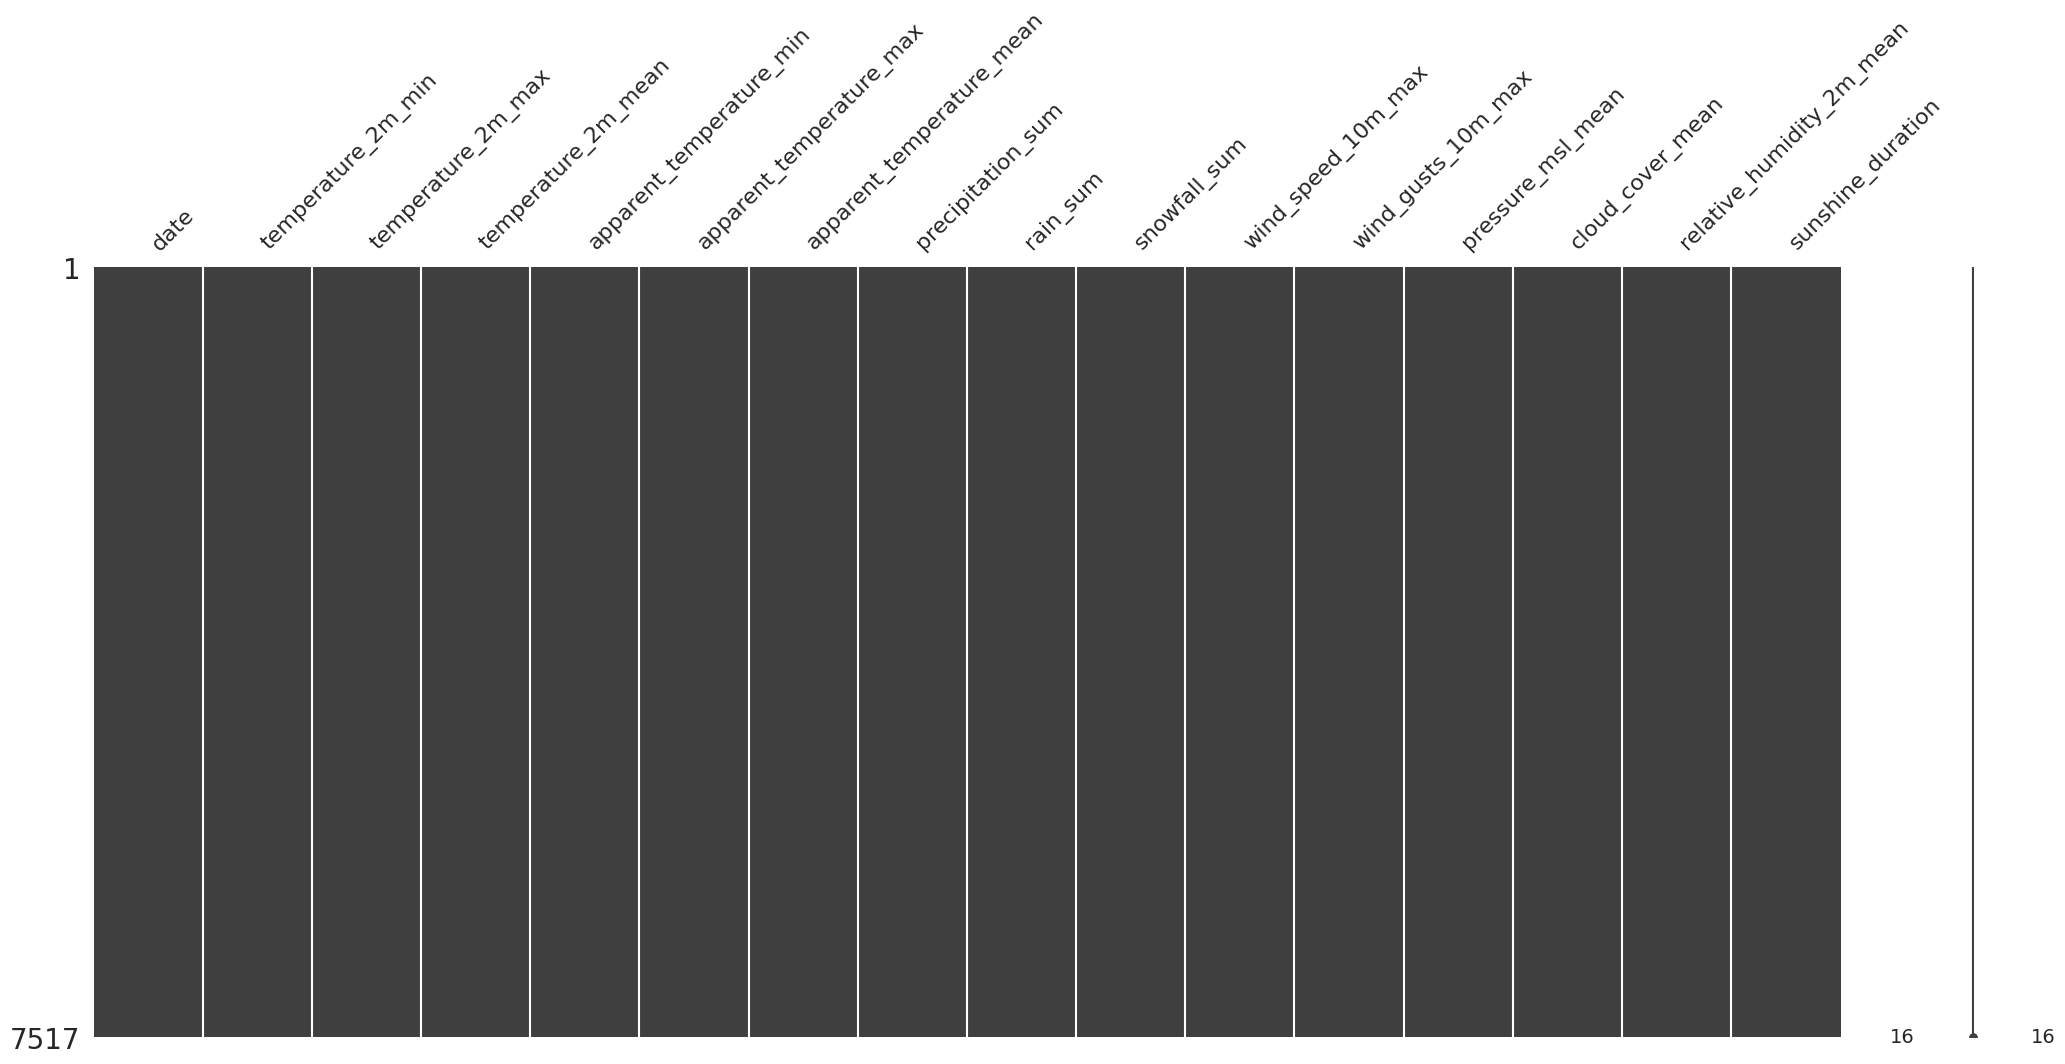

In [ ]:
import missingno as msno

# Valores nulos por columna
nulos = df.isnull().sum()
print("🔍 Valores nulos por columna:")
print(nulos)

# Representación grafica de valores nulos
msno.matrix(df)


### **4.3 - Tratamiento de outliers**

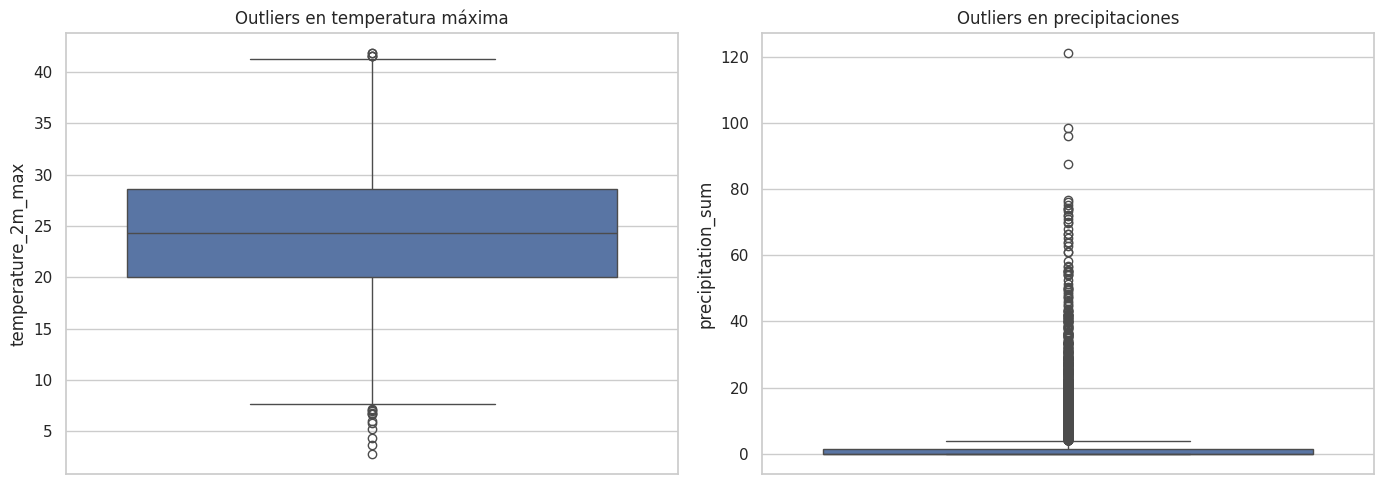

In [ ]:
# Visualización con boxplots para detectar outliers en temperatura máxima y precipitaciones
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["temperature_2m_max"])
plt.title("Outliers en temperatura máxima")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["precipitation_sum"])
plt.title("Outliers en precipitaciones")

plt.tight_layout()
plt.show()


#### 🎯 ***Decisión sobre tratamiento de outliers***

Durante la inspección visual mediante boxplots, se identificaron valores extremos en las variables `temperature_2m_max` (temperatura máxima) y `precipitation_sum` (precipitaciones diarias).

- En el caso de la **temperatura máxima**, los outliers observados corresponden a registros puntuales por debajo de 5 °C o por encima de 40 °C. Estos valores, aunque atípicos, son posibles en eventos extremos de frío o calor, y reflejan condiciones reales que pueden impactar directamente en la demanda de productos de climatización. Por lo tanto, se decidió **conservarlos sin modificaciones**.

- En el caso de las **precipitaciones**, se observó una alta concentración de outliers por encima del percentil 99, con valores superiores a 60 mm diarios. Estos registros probablemente representan eventos de tormenta o lluvias intensas que también son climáticamente significativos. Si bien estos valores podrían distorsionar algunas métricas estadísticas, **son relevantes para el análisis comercial**, por lo que **se decidió no eliminarlos ni transformarlos** en esta etapa.

> En resumen, se optó por **mantener los valores originales** de ambas variables para preservar la fidelidad histórica del dataset y no perder información valiosa sobre fenómenos extremos que podrían ser relevantes para la planificación comercial en retail.


### ***4.4 - Otras transformaciones: fechas, nuevas columnas***

In [ ]:
# Convertimos la columna de fecha al huso horario local (opcional)
df["date_local"] = df["date"].dt.tz_convert("America/Argentina/Salta")

# Extraemos nuevas columnas útiles para análisis temporal
df["año"] = df["date_local"].dt.year
df["mes"] = df["date_local"].dt.month
df["día"] = df["date_local"].dt.day
df["día_semana"] = df["date_local"].dt.day_name()
df["mes_nombre"] = df["date_local"].dt.month_name()

# Diccionarios de traducción
meses = {
    1: "enero", 2: "febrero", 3: "marzo", 4: "abril",
    5: "mayo", 6: "junio", 7: "julio", 8: "agosto",
    9: "septiembre", 10: "octubre", 11: "noviembre", 12: "diciembre"
}

dias = {
    0: "lunes", 1: "martes", 2: "miércoles", 3: "jueves",
    4: "viernes", 5: "sábado", 6: "domingo"
}

# Crear columnas con valores numéricos
df["mes"] = df["date_local"].dt.month
df["dia_semana_num"] = df["date_local"].dt.weekday

# Mapear a texto en español
df["mes_nombre"] = df["mes"].map(meses)
df["día_semana"] = df["dia_semana_num"].map(dias)

# Preview
df[["date_local", "mes", "mes_nombre", "dia_semana_num", "día_semana"]].head()



# Preview
df[["date_local", "año", "mes", "mes_nombre", "día_semana"]].head()

,date_local,año,mes,mes_nombre,día_semana
0,2005-01-01 00:00:00-03:00,2005,1,enero,sábado
1,2005-01-02 00:00:00-03:00,2005,1,enero,domingo
2,2005-01-03 00:00:00-03:00,2005,1,enero,lunes
3,2005-01-04 00:00:00-03:00,2005,1,enero,martes
4,2005-01-05 00:00:00-03:00,2005,1,enero,miércoles


### ***4.5 - Normalización de datos***

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columnas elegidas para normalizar
cols_a_normalizar = [
    "temperature_2m_min", "temperature_2m_max", "temperature_2m_mean",
    "apparent_temperature_min", "apparent_temperature_max", "apparent_temperature_mean",
    "precipitation_sum", "rain_sum",
    "wind_speed_10m_max", "wind_gusts_10m_max",
    "pressure_msl_mean", "sunshine_duration"
]

# Aplicar normalización Min-Max
scaler = MinMaxScaler()
df[[f"{col}_norm" for col in cols_a_normalizar]] = scaler.fit_transform(df[cols_a_normalizar])

# Mostrar preview
df[[*cols_a_normalizar, *[f"{col}_norm" for col in cols_a_normalizar]]].head()



,temperature_2m_min,temperature_2m_max,temperature_2m_mean,apparent_temperature_min,apparent_temperature_max,apparent_temperature_mean,precipitation_sum,rain_sum,wind_speed_10m_max,wind_gusts_10m_max,...,temperature_2m_mean_norm,apparent_temperature_min_norm,apparent_temperature_max_norm,apparent_temperature_mean_norm,precipitation_sum_norm,rain_sum_norm,wind_speed_10m_max_norm,wind_gusts_10m_max_norm,pressure_msl_mean_norm,sunshine_duration_norm
0,20.950001,26.549999,23.697916,24.049232,32.402000,27.784178,22.4,22.4,10.829958,31.680000,...,0.708187,0.865307,0.731081,0.798809,0.184971,0.184971,0.158710,0.275362,0.335806,0.965414
1,20.200001,27.850000,23.812502,23.075848,33.181248,27.456598,6.4,6.4,11.928989,26.639999,...,0.711605,0.841186,0.748080,0.790526,0.052849,0.052849,0.185566,0.207729,0.380390,0.911551
2,18.150000,31.450001,24.949997,20.447903,37.370834,29.105316,0.0,0.0,8.121970,20.519999,...,0.745535,0.776064,0.839471,0.832215,0.000000,0.000000,0.092538,0.125604,0.273521,0.999072
3,20.299999,34.099998,26.668747,22.878204,37.819969,30.214415,0.0,0.0,17.068707,33.119999,...,0.796803,0.836288,0.849268,0.860260,0.000000,0.000000,0.311160,0.294686,0.220875,0.999360
4,22.150000,34.500000,28.343750,23.978689,39.006580,31.361780,0.0,0.0,16.375053,33.839996,...,0.846767,0.863559,0.875153,0.889272,0.000000,0.000000,0.294210,0.304348,0.183525,0.999616


#### ***⚖️ Normalización de variables numéricas***

En esta etapa se aplicó una transformación de **escalado Min-Max** sobre un conjunto de variables numéricas con rangos muy diferentes entre sí. Esta técnica permite transformar los valores a un rango estándar entre 0 y 1, sin perder la proporcionalidad de los datos originales.

Se decidió **no modificar las columnas originales**, sino crear nuevas columnas con el sufijo `_norm` para preservar las unidades reales (°C, mm, hPa, etc.) y facilitar la interpretación del análisis descriptivo.

##### 📌 Variables normalizadas:
- Temperaturas reales y aparentes (mínima, máxima y media)
- Precipitaciones (`precipitation_sum` y `rain_sum`)
- Velocidad del viento (`wind_speed_10m_max`, `wind_gusts_10m_max`)
- Presión atmosférica (`pressure_msl_mean`)
- Duración de la radiación solar (`sunshine_duration`)

##### ❌ Variables excluidas de la normalización:
- Variables expresadas en porcentaje como `relative_humidity_2m_mean` o `cloud_cover_mean`, que ya están naturalmente en una escala estandarizada de 0 a 100.
- `snowfall_sum`, que presenta valores nulos o insignificantes para esta ubicación geográfica (San Miguel de Tucumán), por lo que no aporta valor al análisis ni a la modelización.

Esta transformación no es estrictamente necesaria para el análisis exploratorio, pero resulta útil si se desean aplicar posteriormente modelos de predicción o técnicas estadísticas sensibles a la escala de las variables.


### ***4.6 - Redefinición de nombres de columnas***



In [ ]:
df.rename(columns={
    # Originales con unidades
    "date": "fecha_utc",
    "temperature_2m_min": "temp_minima (°C)",
    "temperature_2m_max": "temp_maxima (°C)",
    "temperature_2m_mean": "temp_media (°C)",
    "apparent_temperature_min": "temp_aparente_min (°C)",
    "apparent_temperature_max": "temp_aparente_max (°C)",
    "apparent_temperature_mean": "temp_aparente_media (°C)",
    "precipitation_sum": "precipitacion_total (mm)",
    "rain_sum": "lluvia_total (mm)",
    "snowfall_sum": "nieve_total (cm)",
    "wind_speed_10m_max": "viento_max (km/h)",
    "wind_gusts_10m_max": "rafagas_max (km/h)",
    "pressure_msl_mean": "presion_media (hPa)",
    "cloud_cover_mean": "nubosidad_media (%)",
    "relative_humidity_2m_mean": "humedad_relativa (%)",
    "sunshine_duration": "duracion_sol (segundos)",

    # Derivadas temporales
    "date_local": "fecha_local",
    "año": "anio",
    "mes": "mes_num",
    "día": "dia_mes",
    "día_semana": "dia_semana",
    "mes_nombre": "mes_nombre",
    "dia_semana_num": "dia_semana_num",

    # Columnas normalizadas (sin unidad, son escalas de 0 a 1)
    "temperature_2m_min_norm": "temp_minima (norm)",
    "temperature_2m_max_norm": "temp_maxima (norm)",
    "temperature_2m_mean_norm": "temp_media (norm)",
    "apparent_temperature_min_norm": "temp_aparente_min (norm)",
    "apparent_temperature_max_norm": "temp_aparente_max (norm)",
    "apparent_temperature_mean_norm": "temp_aparente_media (norm)",
    "precipitation_sum_norm": "precipitacion_total (norm)",
    "rain_sum_norm": "lluvia_total (norm)",
    "wind_speed_10m_max_norm": "viento_max (norm)",
    "wind_gusts_10m_max_norm": "rafagas_max (norm)",
    "pressure_msl_mean_norm": "presion_media (norm)",
    "sunshine_duration_norm": "duracion_sol (norm)"
}, inplace=True)


for col in df.columns:
    print(col)


fecha_utc
temp_minima (°C)
temp_maxima (°C)
temp_media (°C)
temp_aparente_min (°C)
temp_aparente_max (°C)
temp_aparente_media (°C)
precipitacion_total (mm)
lluvia_total (mm)
nieve_total (cm)
viento_max (km/h)
rafagas_max (km/h)
presion_media (hPa)
nubosidad_media (%)
humedad_relativa (%)
duracion_sol (segundos)
fecha_local
anio
mes_num
dia_mes
dia_semana
mes_nombre
dia_semana_num
temp_minima (norm)
temp_maxima (norm)
temp_media (norm)
temp_aparente_min (norm)
temp_aparente_max (norm)
temp_aparente_media (norm)
precipitacion_total (norm)
lluvia_total (norm)
viento_max (norm)
rafagas_max (norm)
presion_media (norm)
duracion_sol (norm)


### ✅ ***Conclusión del proceso de limpieza y transformación***

Finalizada esta etapa de **Data Wrangling**, se dispone de un dataset limpio, consistente y enriquecido con nuevas variables temporales y versiones normalizadas de las principales métricas climáticas.

No se detectaron valores nulos ni duplicados, y los valores atípicos fueron analizados, decidiéndose conservarlos por su relevancia climática y comercial. Además, se incorporaron transformaciones que permitirán segmentar fácilmente los datos por mes, estación, día de la semana o intensidad de variables como temperatura y precipitaciones.

Este dataset ya está listo para ser explorado visual y estadísticamente en el siguiente paso del proyecto: el **Análisis Exploratorio de Datos (EDA)**, donde comenzaremos a identificar patrones y tendencias que puedan explicar la demanda de productos de climatización en el contexto del clima tucumano.


## **5 – Análisis Exploratorio de Datos (EDA)**

Una vez finalizado el proceso de limpieza, transformación y enriquecimiento de los datos climáticos, estamos en condiciones de comenzar el análisis exploratorio. Esta etapa es clave para detectar patrones, tendencias, estacionalidades y relaciones significativas entre variables que puedan explicar comportamientos comerciales vinculados a la demanda de productos de climatización en el contexto de Oscar Barbieri S.A.

El EDA se plantea como una narrativa visual estructurada en tres niveles:

1. **Análisis univariado**, para entender la distribución individual de las variables principales como temperatura, precipitaciones o humedad.
2. **Análisis bivariado**, para explorar relaciones entre pares de variables, como la asociación entre temperatura y humedad o entre radiación solar y sensación térmica.
3. **Análisis multivariado**, para detectar combinaciones de condiciones climáticas que se repiten o se agrupan en ciertas épocas del año.

A lo largo del análisis, se buscará validar las hipótesis planteadas en la sección 2 del proyecto, utilizando herramientas gráficas y estadísticas que faciliten una interpretación clara y orientada al negocio. Cada visualización irá acompañada de un breve insight que explique su relevancia comercial.

Este enfoque no solo permite comprender el pasado climático de Tucumán, sino también anticipar escenarios futuros que justifiquen decisiones logísticas, promocionales o de stock en función del clima.


### ***5.1 – Análisis Univariado: Estacionalidad de las temperaturas extremas: máxima y mínima***

Con el objetivo de validar la **Hipótesis 1**, analizamos si las temperaturas máximas y mínimas diarias presentan un patrón estacional claro a lo largo del año.

Esta exploración permite responder a la pregunta: **¿Qué meses concentran las temperaturas más altas y más bajas del año?**, lo cual es clave para anticipar períodos de alta demanda de productos de climatización en retail: aires acondicionados, ventiladores o estufas eléctricas.

A continuación, se presentan dos gráficos de caja (boxplots) que muestran la distribución mensual de temperaturas máximas y mínimas, permitiendo identificar la estacionalidad térmica de manera visual.


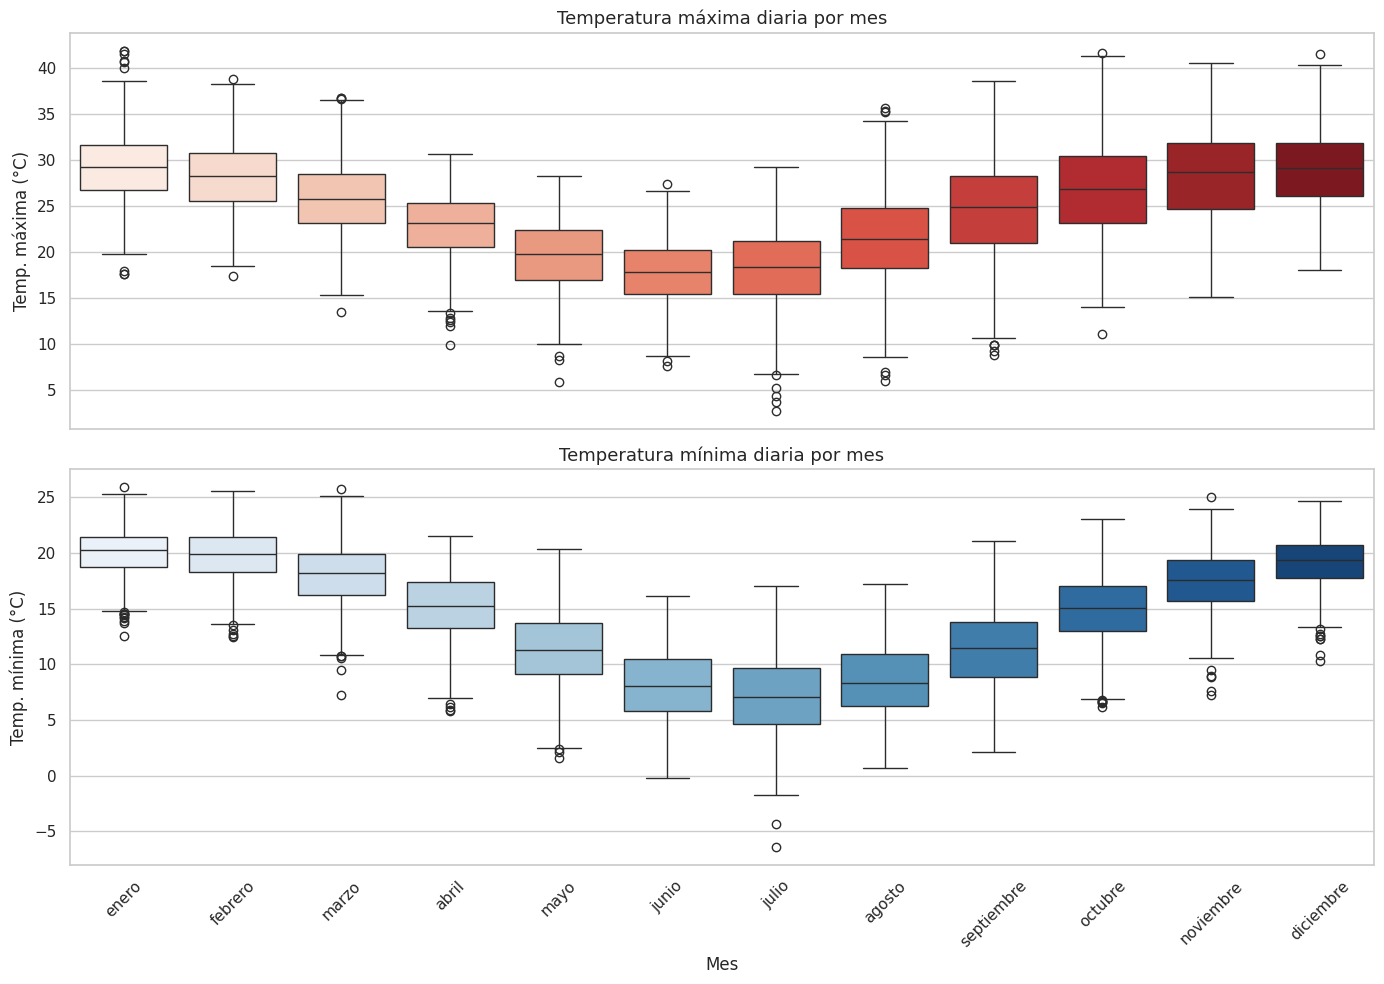

In [ ]:
# Crear figura con dos subgráficos
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Boxplot de temperatura máxima por mes
sns.boxplot(
    data=df, x="mes_nombre", y="temp_maxima (°C)", hue="mes_nombre",
    order=orden_meses, ax=axes[0], palette="Reds", legend=False
)
axes[0].set_title("Temperatura máxima diaria por mes", fontsize=13)
axes[0].set_ylabel("Temp. máxima (°C)")
axes[0].set_xlabel("")

# Boxplot de temperatura mínima por mes
sns.boxplot(
    data=df, x="mes_nombre", y="temp_minima (°C)", hue="mes_nombre",
    order=orden_meses, ax=axes[1], palette="Blues", legend=False
)
axes[1].set_title("Temperatura mínima diaria por mes", fontsize=13)
axes[1].set_ylabel("Temp. mínima (°C)")
axes[1].set_xlabel("Mes")

# Estética final
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




#### ✅ **Conclusión – Hipótesis 1: Estacionalidad térmica**

Los gráficos muestran un patrón estacional claramente definido tanto para la temperatura máxima como para la mínima diaria en San Miguel de Tucumán.

- **Las temperaturas más altas** se concentran en los meses de verano (diciembre, enero y febrero), con medianas por encima de los 30°C y máximos que pueden superar los 40°C.
- **Las temperaturas más bajas** se registran en los meses de invierno (junio y julio), con mínimas cercanas o incluso por debajo de los 5°C.

Este comportamiento confirma la **Hipótesis 1**: existe una lógica estacional marcada, lo que permite **anticipar con precisión los períodos críticos para la planificación comercial** de productos de climatización, tanto de refrigeración como calefacción.

Esta estacionalidad también representa una **oportunidad de sincronización entre el calendario promocional y el comportamiento climático real**, ajustando campañas, logística y stock a los meses de mayor demanda térmica.


### ***5.2 – Análisis Bivariado: Relación entre temperaturas extremas y otras variables climáticas***

Con el objetivo de validar la **Hipótesis 2**, analizamos cómo se relacionan las temperaturas extremas con otras variables meteorológicas como la humedad, la nubosidad, la presión atmosférica o el viento.

Esto nos permitirá identificar si existen condiciones típicas que acompañan a los días muy calurosos o muy fríos, y si estas podrían utilizarse como predictores complementarios en un modelo de estimación de la sensación térmica o demanda de productos estacionales.

A continuación, se presenta un mapa de calor con las correlaciones lineales entre las principales variables meteorológicas.


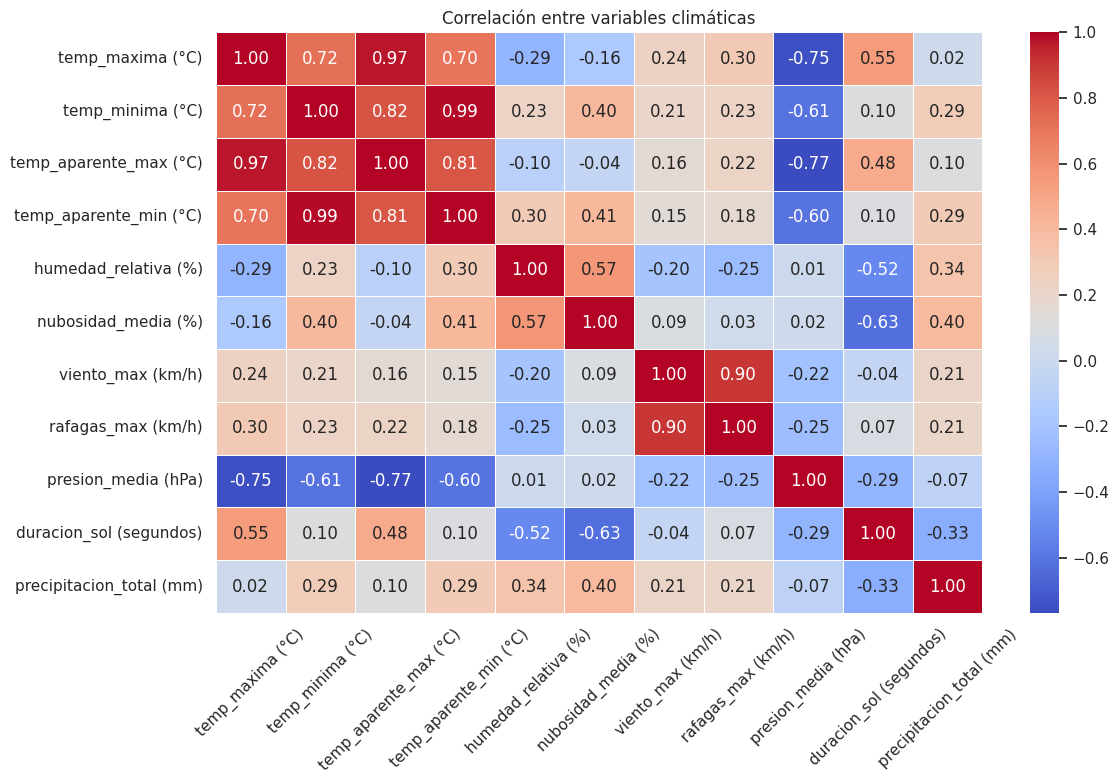

In [ ]:
# Subset de variables de interés para la correlación (con nuevos nombres)
variables_climaticas = [
    "temp_maxima (°C)", "temp_minima (°C)",
    "temp_aparente_max (°C)", "temp_aparente_min (°C)",
    "humedad_relativa (%)", "nubosidad_media (%)",
    "viento_max (km/h)", "rafagas_max (km/h)",
    "presion_media (hPa)", "duracion_sol (segundos)", "precipitacion_total (mm)"
]

# Calcular matriz de correlación
corr_matrix = df[variables_climaticas].corr()

# Visualizar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlación entre variables climáticas")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



#### **Conclusión – Hipótesis 2: Condiciones asociadas a temperaturas extremas**

El análisis de correlación entre variables meteorológicas confirma que existen **condiciones climáticas típicas que acompañan los días de temperaturas extremas**, lo que valida la **Hipótesis 2**.

**Principales hallazgos:**

- 🔥 **Temperaturas máximas**:
  - Alta correlación positiva con la **temperatura aparente** (`r = 0.97`) y la **duración del sol** (`r = 0.55`).
  - Correlación negativa con la **presión atmosférica** (`r = -0.75`) y la **humedad relativa** (`r = -0.29`).
  - También se asocian a menor nubosidad (`r = -0.16`).

- ❄️ **Temperaturas mínimas**:
  - Fuertemente asociadas a su temperatura aparente (`r = 0.99`).
  - Relación positiva moderada con la **humedad** y la **nubosidad** (`r = 0.30` y `r = 0.40` respectivamente), lo que sugiere que noches nubladas y húmedas podrían amortiguar los descensos térmicos.

- 💨 Las variables de viento presentan **correlaciones bajas** con la temperatura, aunque podrían incidir indirectamente en la sensación térmica.

Este patrón sugiere que las temperaturas extremas **no se explican solo por la temperatura medida**, sino que están acompañadas por **combinaciones típicas** de otras condiciones meteorológicas. Esto brinda oportunidades para construir un modelo predictivo más robusto para anticipar sensaciones térmicas o demanda de productos estacionales.


### ***5.3 – Análisis derivado de una sola variable y bivariado: Amplitud térmica***

La amplitud térmica —diferencia entre la temperatura máxima y mínima de un mismo día— es una métrica clave para identificar jornadas que pueden generar una **demanda mixta de productos de climatización**: frío al mediodía y calor por la mañana o noche.

Validar la **Hipótesis 3** implica detectar qué tan frecuente es esta situación, en qué meses ocurre con mayor intensidad y cuáles son los valores extremos registrados.

A través del siguiente análisis, buscamos conocer no solo la distribución general de amplitudes térmicas, sino también si ciertas **condiciones atmosféricas** (como humedad o nubosidad) tienden a estar asociadas a mayores diferencias térmicas.


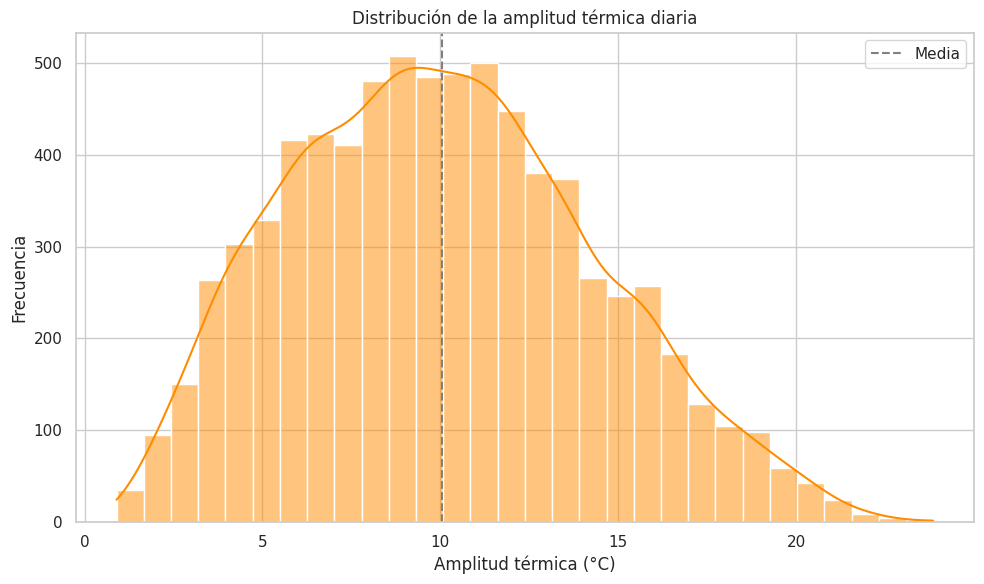

,fecha_local,temp_minima (°C),temp_maxima (°C),amplitud_termica (°C)
0,2007-08-14 00:00:00-03:00,8.350000,32.200001,23.850000
1,2023-08-22 00:00:00-03:00,11.422500,35.272499,23.849998
2,2006-09-10 00:00:00-03:00,12.150000,34.599998,22.449999
3,2022-10-07 00:00:00-03:00,10.172500,32.622498,22.449997
4,2022-09-07 00:00:00-03:00,7.972500,30.372499,22.400000
5,2022-10-29 00:00:00-03:00,16.872499,39.272499,22.400000
6,2009-10-04 00:00:00-03:00,12.350000,34.500000,22.150000
7,2005-10-11 00:00:00-03:00,13.450000,35.549999,22.099998
8,2020-09-30 00:00:00-03:00,13.022500,35.072498,22.049999
9,2013-08-29 00:00:00-03:00,7.300000,29.200001,21.900002


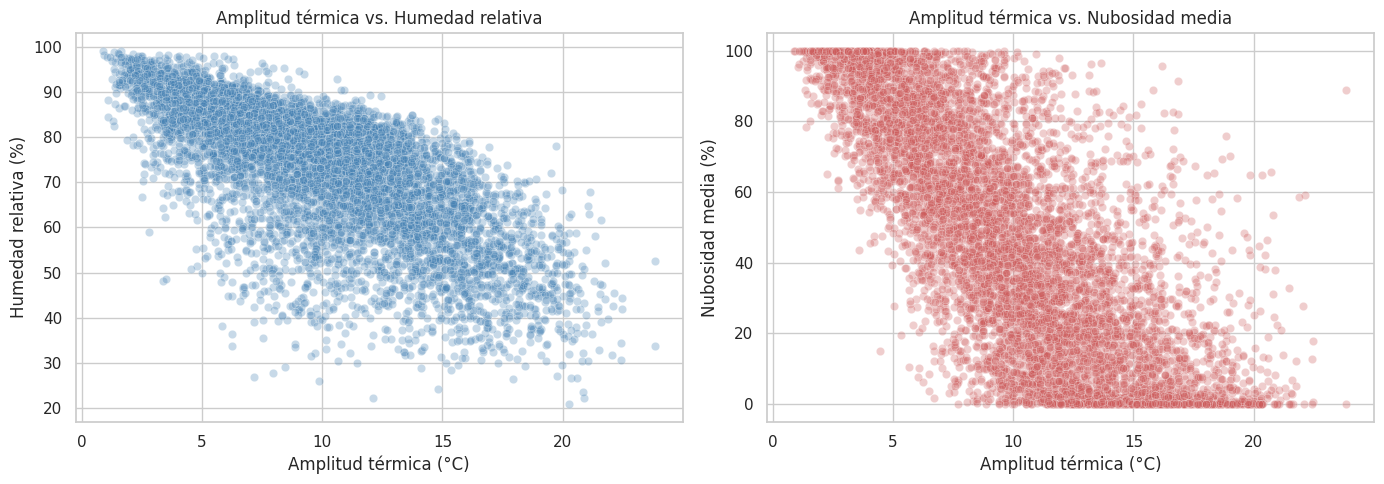

In [ ]:
# Crear columna de amplitud térmica
df["amplitud_termica (°C)"] = df["temp_maxima (°C)"] - df["temp_minima (°C)"]


# Histograma de amplitud térmica
plt.figure(figsize=(10, 6))
sns.histplot(df["amplitud_termica (°C)"], bins=30, kde=True, color="darkorange")
plt.axvline(df["amplitud_termica (°C)"].mean(), color="gray", linestyle="--", label="Media")
plt.title("Distribución de la amplitud térmica diaria")
plt.xlabel("Amplitud térmica (°C)")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

# Top 10 días con mayor diferencia térmica
top_amplitud = df[["fecha_local", "temp_minima (°C)", "temp_maxima (°C)", "amplitud_termica (°C)"]]
top_amplitud = top_amplitud.sort_values(by="amplitud_termica (°C)", ascending=False).head(10)

top_amplitud.reset_index(drop=True, inplace=True)
display(top_amplitud)

# Crear figura con 2 gráficos horizontales
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatterplot amplitud térmica vs. humedad relativa
sns.scatterplot(
    data=df,
    x="amplitud_termica (°C)",
    y="humedad_relativa (%)",
    alpha=0.3,
    ax=axes[0],
    color="steelblue"
)
axes[0].set_title("Amplitud térmica vs. Humedad relativa")
axes[0].set_xlabel("Amplitud térmica (°C)")
axes[0].set_ylabel("Humedad relativa (%)")

# Scatterplot amplitud térmica vs. nubosidad media
sns.scatterplot(
    data=df,
    x="amplitud_termica (°C)",
    y="nubosidad_media (%)",
    alpha=0.3,
    ax=axes[1],
    color="indianred"
)
axes[1].set_title("Amplitud térmica vs. Nubosidad media")
axes[1].set_xlabel("Amplitud térmica (°C)")
axes[1].set_ylabel("Nubosidad media (%)")

# Ajuste final
plt.tight_layout()
plt.show()



#### **Conclusión – Hipótesis 3: Amplitud térmica**

El análisis confirma que existen **días con alta amplitud térmica** (superior a 20 °C), caracterizados por mañanas frías y tardes calurosas. Este fenómeno representa oportunidades comerciales para productos de climatización dual (como aires inverter o caloventores con termostato).

Además, se observaron **patrones climáticos asociados a la amplitud térmica**:
- A mayor amplitud, la **humedad relativa disminuye**, lo que puede acentuar la percepción de calor.
- También se detecta una **relación inversa con la nubosidad**, sugiriendo que los días con cielo despejado tienden a tener más variabilidad térmica.

Estos hallazgos fortalecen la hipótesis y pueden ayudar a anticipar jornadas de alta exigencia térmica, optimizando la planificación de stock y campañas comerciales.


### ***5.4 – Análisis univariado: Eventos térmicos extremos y su recurrencia***

Esta hipótesis se enfoca en detectar la ocurrencia de eventos térmicos extremos —específicamente, días con temperaturas **máximas superiores a 30 °C** y **mínimas inferiores a 5 °C**— a lo largo de los años.

El objetivo es comprender:
- 📈 **Con qué frecuencia** se presentan estos eventos.
- 📅 **En qué períodos del año** son más probables.
- 🔁 Si existe un **patrón de recurrencia interanual**, útil para anticipar picos de demanda en productos de climatización.

Este análisis sienta las bases para modelos predictivos orientados a detectar anticipadamente condiciones que impactan el comportamiento de compra de los consumidores.


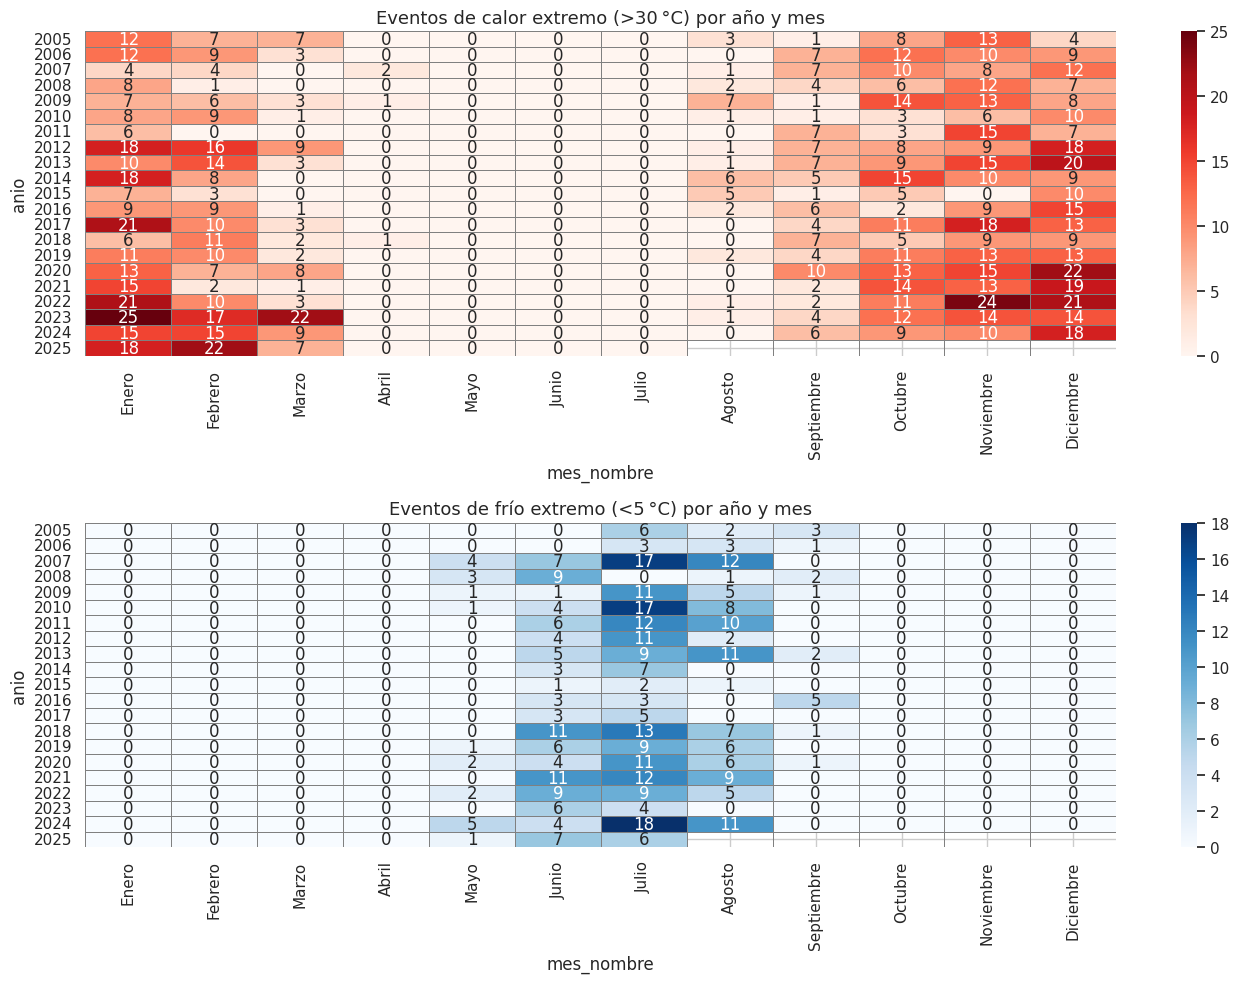

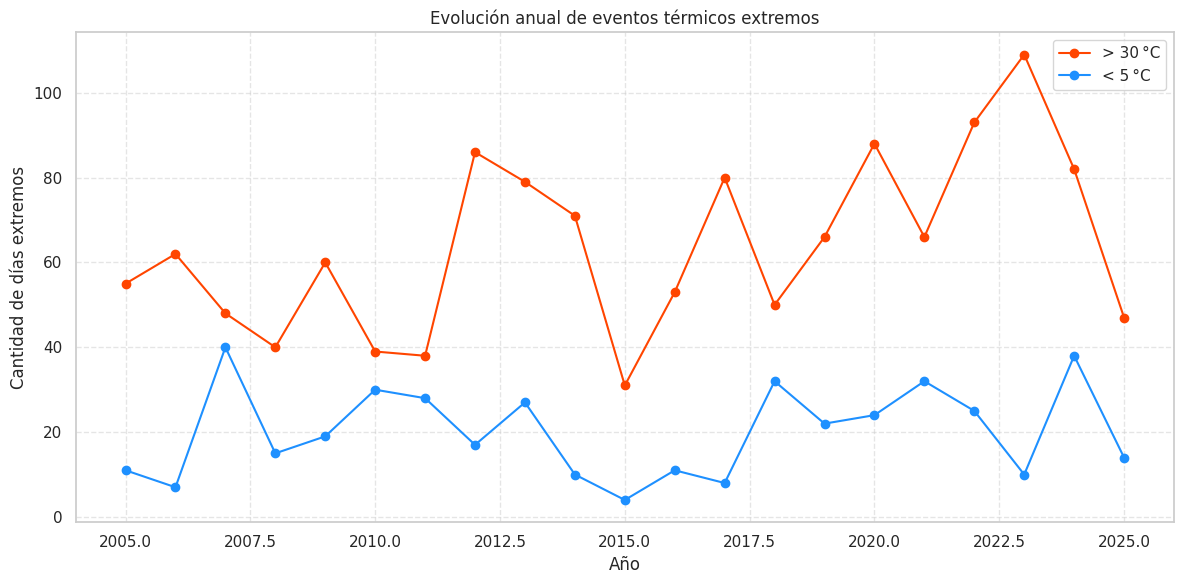

In [ ]:
# 1. Crear columnas booleanas para eventos extremos
df["evento_calor"] = df["temp_maxima (°C)"] > 30
df["evento_frio"] = df["temp_minima (°C)"] < 5

# 2. Crear orden correcto de los meses en español
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# 3. Asegurarse que mes_nombre esté en español correctamente capitalizado
df["mes_nombre"] = df["mes_nombre"].str.capitalize()

# 4. Agrupar cantidad de eventos por año y mes
tabla_eventos = df.groupby(["anio", "mes_nombre"])[["evento_calor", "evento_frio"]].sum().reset_index()

# 5. Pivot para crear matriz de calor por evento
heatmap_calor = tabla_eventos.pivot(index="anio", columns="mes_nombre", values="evento_calor")[orden_meses]
heatmap_frio = tabla_eventos.pivot(index="anio", columns="mes_nombre", values="evento_frio")[orden_meses]

# 6. Graficar ambos heatmaps
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Heatmap de días de calor extremos
sns.heatmap(heatmap_calor, cmap="Reds", linewidths=0.5, linecolor='gray', ax=axes[0], annot=True, fmt=".0f")
axes[0].set_title("Eventos de calor extremo (>30 °C) por año y mes", fontsize=13)

# Heatmap de días de frío extremos
sns.heatmap(heatmap_frio, cmap="Blues", linewidths=0.5, linecolor='gray', ax=axes[1], annot=True, fmt=".0f")
axes[1].set_title("Eventos de frío extremo (<5 °C) por año y mes", fontsize=13)

plt.tight_layout()
plt.show()

# Grafico de progresión anual

# Agrupar por año los eventos
resumen_anual = df.groupby("anio")[["evento_calor", "evento_frio"]].sum().reset_index()

# Crear gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(resumen_anual["anio"], resumen_anual["evento_calor"], marker="o", label="> 30 °C", color="orangered")
plt.plot(resumen_anual["anio"], resumen_anual["evento_frio"], marker="o", label="< 5 °C", color="dodgerblue")
plt.title("Evolución anual de eventos térmicos extremos")
plt.xlabel("Año")
plt.ylabel("Cantidad de días extremos")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


#### **Conclusión – Hipótesis 4: Análisis de temperaturas extremas**

El análisis histórico de eventos térmicos extremos revela un patrón estacional claro y cierta tendencia creciente en la frecuencia de temperaturas extremas, especialmente en los días calurosos (>30 °C). Los meses de enero, febrero, noviembre y diciembre concentran la mayoría de estos eventos, confirmando su impacto en la demanda estacional de equipos de refrigeración.

En contraste, los días con temperaturas mínimas extremas (<5 °C) se concentran principalmente entre junio y julio, aunque su frecuencia anual es menor y muestra mayor variabilidad interanual.

El gráfico de evolución anual muestra una tendencia general al alza en los eventos de calor extremo, con picos destacados en los últimos años, lo cual refuerza la necesidad de una planificación comercial proactiva ante olas de calor cada vez más frecuentes.

📌 Estos hallazgos sustentan la posibilidad de construir un modelo predictivo basado en patrones históricos para anticipar picos de temperatura, lo que permitiría a Oscar Barbieri S.A. ajustar su logística, inventario y campañas promocionales en función de la climatología esperada.

### ***5.5 – Análisis multivariado: Estacionalidad termica***

Esta hipótesis busca identificar comportamientos climáticos típicos que se repiten a lo largo de los años en San Miguel de Tucumán, no a partir de una sola variable, sino mediante la combinación simultánea de múltiples condiciones meteorológicas.

El objetivo principal es detectar si existen:

🌤️ Perfiles climáticos multivariados estables que caractericen a cada mes o estación.

🧩 Agrupamientos naturales de días con condiciones similares, independientemente del mes.

📊 Variables clave que definen estos agrupamientos, como temperatura, radiación solar, viento, presión o precipitaciones.


Este análisis es fundamental para anticipar condiciones climáticas recurrentes que afectan la demanda de productos estacionales, permitiendo una planificación comercial más precisa y ajustada al comportamiento histórico del clima.

#### ***Gráfico 1 – Distribución de días según condiciones climáticas (PCA por mes)***

Aplicamos Análisis de Componentes Principales (PCA) sobre 12 variables meteorológicas normalizadas con el objetivo de reducir la dimensionalidad y observar cómo se distribuyen los días del año en función de sus condiciones climáticas combinadas.

Coloreamos los puntos por mes para detectar si los días de cada mes tienden a agruparse en zonas específicas del espacio multivariado. Esto permite identificar **estacionalidad climática consistente a lo largo de los años**.


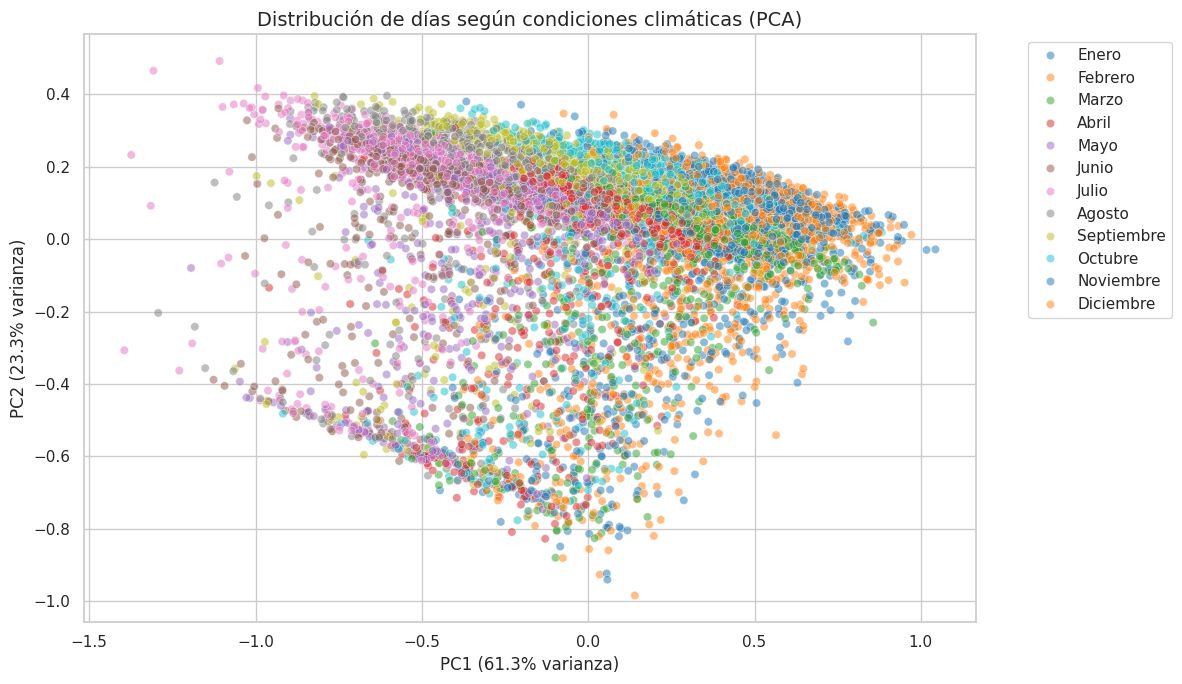

Varianza total explicada: 84.63%
                                 PC1       PC2
temp_aparente_media (norm)  0.411524  0.137905
temp_aparente_max (norm)    0.391454  0.005967
temp_aparente_min (norm)    0.367218  0.281975
temp_media (norm)           0.367075  0.083956
temp_minima (norm)          0.349232  0.266199
temp_maxima (norm)          0.336522  0.071091
duracion_sol (norm)         0.314472  0.882164
presion_media (norm)        0.256211  0.034241
rafagas_max (norm)          0.066836  0.035137
viento_max (norm)           0.055131  0.076599
lluvia_total (norm)         0.016805  0.126459
precipitacion_total (norm)  0.016804  0.126459


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aseguramos orden cronológico de los meses
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df["mes_nombre"] = pd.Categorical(df["mes_nombre"], categories=orden_meses, ordered=True)

# Variables meteorológicas normalizadas para el PCA
cols_pca = [
    "temp_minima (norm)", "temp_maxima (norm)", "temp_media (norm)",
    "temp_aparente_min (norm)", "temp_aparente_max (norm)", "temp_aparente_media (norm)",
    "precipitacion_total (norm)", "lluvia_total (norm)",
    "viento_max (norm)", "rafagas_max (norm)",
    "presion_media (norm)", "duracion_sol (norm)"
]
X = df[cols_pca]

# Aplicamos PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df["PC1"] = pca_result[:, 0]
df["PC2"] = pca_result[:, 1]

# Visualización
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="mes_nombre", palette="tab10", alpha=0.5)
plt.title("Distribución de días según condiciones climáticas (PCA)", fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Varianza explicada (opcional)
print(f"Varianza total explicada: {pca.explained_variance_ratio_.sum():.2%}")

# Crear un DataFrame con las cargas de cada variable en los componentes principales
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2'],
                        index=cols_pca)

# Ordenar por contribución absoluta para ver qué variables más influyen en cada componente
loadings_abs = loadings.abs().sort_values(by='PC1', ascending=False)
print(loadings_abs)




#### 📌 ***Conclusión parcial - Distribución de días según condiciones climáticas (PCA por mes)***

El análisis de Componentes Principales (PCA) revela que las condiciones climáticas en San Miguel de Tucumán presentan **patrones estacionales estables**, donde los días de cada mes tienden a agruparse en zonas consistentes del espacio multivariado.

El modelo logra explicar un **84.63% de la variabilidad total** con solo dos componentes, lo que indica una estructura climática altamente predecible a lo largo del año.

🔍 **¿Qué representa cada componente?**
- **PC1 (61.3%)** capta principalmente la **intensidad térmica**, ya que está fuertemente influenciado por variables como:
  - `temp_aparente_media`, `temp_aparente_max`, `temp_media`, `temp_minima`, `temp_maxima`
- **PC2 (23.3%)** está más relacionado con **radiación solar y presión atmosférica**, con aportes destacados de:
  - `duracion_sol`, `presion_media`, y en menor medida, `precipitacion_total` y `lluvia_total`

📈 Esto implica que el clima local puede ser caracterizado casi completamente por una combinación de **temperatura y sol**, lo cual es **altamente útil para anticipar el comportamiento de la demanda de productos de climatización**.

Por ejemplo, los meses de verano (enero, diciembre) ocupan la zona de mayor temperatura y sol, mientras que los de invierno (junio, julio) se agrupan en regiones opuestas, reflejando condiciones más frías y nubladas. Esta clara diferenciación estacional permite **diseñar acciones comerciales adaptadas a patrones climáticos recurrentes**.


#### ***Gráfico 2 – Clustering multivariado: Identificación de perfiles climáticos***

En este bloque realizamos un análisis integrado para descubrir **tipologías de días climáticos** sobre el espacio reducido por PCA. Primero, aplicamos **K-Means** directamente sobre las 12 variables meteorológicas normalizadas para agrupar los días en 4 clusters. A continuación, proyectamos esos clusters en el plano PCA (PC1 vs. PC2) para visualizar su separación y validación visual; finalmente, describimos cada grupo con un **mapa de calor** que muestra los valores promedio de todas las variables en cada cluster.

Este enfoque nos permite:
- Detectar “perfiles de día” recurrentes sin anclarnos a un mes determinado.  
- Validar la consistencia de estos grupos en el espacio PCA.  
- Interpretar el carácter climático de cada cluster (p.ej. días muy soleados y cálidos vs. fríos y lluviosos).  

El resultado facilitará la **etiquetación comercial** de cada perfil (ventiladores vs. estufas vs. climatizadores mixtos) y su mapeo estacional en la siguiente sección.

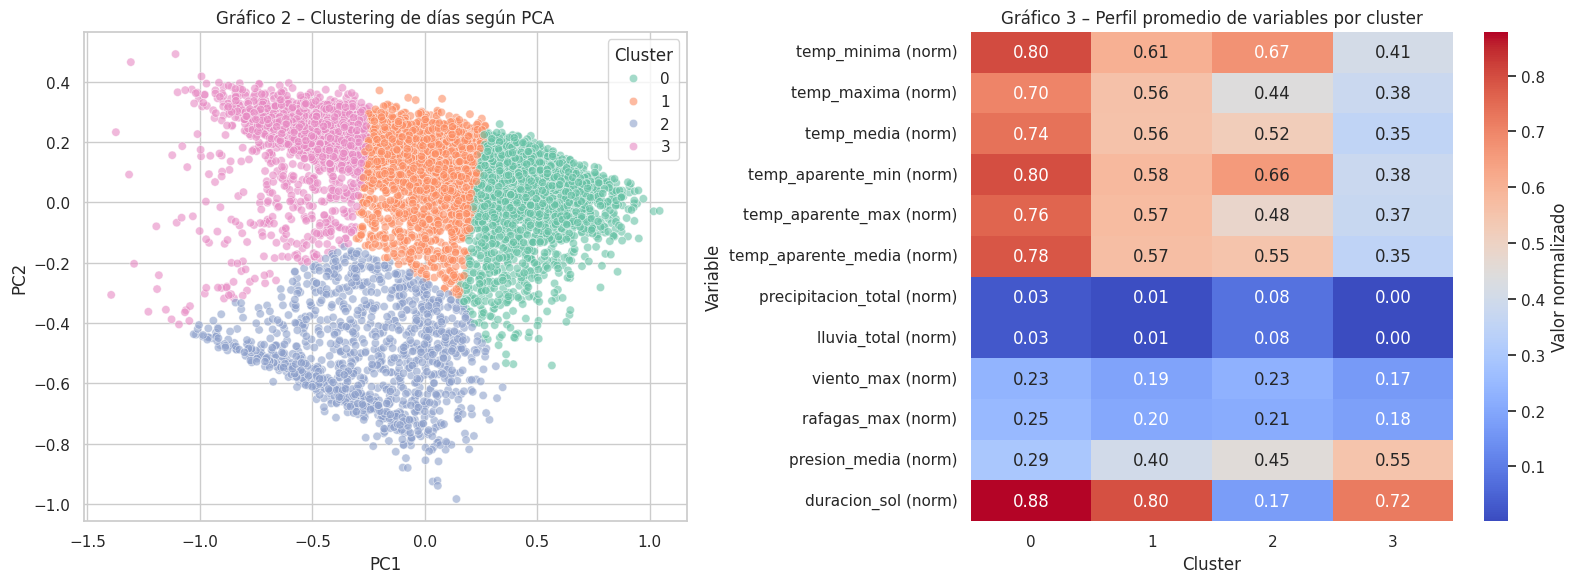

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1. Clustering ----
# Usamos las mismas variables normalizadas que en el PCA
X = df[cols_pca]

# Ejecutamos KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster_climatico"] = kmeans.fit_predict(X)

# ---- 2. Visualización combinada ----
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2A) Scatter PCA coloreado por cluster
sns.scatterplot(ax=axes[0],
                data=df, x="PC1", y="PC2",
                hue="cluster_climatico", palette="Set2",
                legend="brief", alpha=0.6)
axes[0].set_title("Gráfico 2 – Clustering de días según PCA")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend(title="Cluster", loc='upper right')

# 2B) Heatmap de promedios por cluster
cluster_means = df.groupby("cluster_climatico")[cols_pca].mean()
sns.heatmap(cluster_means.T,
            ax=axes[1],
            cmap="coolwarm",
            annot=True, fmt=".2f",
            cbar_kws={'label': 'Valor normalizado'})
axes[1].set_title("Gráfico 3 – Perfil promedio de variables por cluster")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Variable")

plt.tight_layout()
plt.show()



#### 📌 ***Conclusión parcial – Clustering multivariado***

Al agrupar los días en cuatro clusters basados en sus 12 variables meteorológicas normalizadas y proyectarlos en el espacio PCA, obtenemos:

- **Cluster 0 (verde)**: Días de **verano intenso** con `temp_media (norm)` ~0.74 y `duracion_sol (norm)` ~0.88, precipitaciones casi nulas (0.03).  
- **Cluster 1 (naranja)**: Días **cálidos y soleados** ligeramente menos extremos que el Cluster 0 (`temp_media` ~0.56, `duracion_sol` ~0.80), con algo más de presión (`presion_media` ~0.40).  
- **Cluster 2 (azul)**: Días **templados/frescos** (`temp_media` ~ 0.52) con `presion_media` alta (~0.45) y mayor viento (`viento_max` ~0.23).  
- **Cluster 3 (rosado)**: Días **fríos y nublados** con baja temperatura (`temp_media` ~0.35), escasa radiación (`duracion_sol` ~0.72) y mínimas lluvias (`precipitacion_total` ~0.00).

Estos perfiles confirman la existencia de **tipologías climáticas recurrentes**, independientes del calendario mensual, validadas tanto en el plano PCA como en el análisis de promedios:

- Nos permite etiquetar comercialmente cada tipo de día (por ejemplo, Cluster 0→ “picos de aires acondicionados”; Cluster 3→ “demanda de calefactores”).  
- Y anticipar su **frecuencia estacional** mapeando luego estos clusters a los meses del año.

Con esta base podemos pasar a la **conclusión final de la hipótesis 5**, donde integremos PCA y clustering para mostrar cómo los perfiles multivariados se distribuyen a lo largo del calendario.  


### **Conclusión hipótesis 5 - Análisis multivariado de estacionalidad climática**




### Integración de PCA y clustering

1. **Reducción de dimensionalidad**  
   - Aplicamos PCA sobre 12 variables meteorológicas normalizadas y capturamos **84.6 %** de la varianza total con sólo dos componentes.  
   - **PC1 (61.3 %)** refleja sobre todo la **intensidad térmica** (temperatura real y aparente),  
     mientras que **PC2 (23.3 %)** recoge principalmente la **radiación solar** y la **presión atmosférica**.

2. **Agrupación de perfiles climáticos**  
   - Con **K-Means** definimos **4 clusters** de “tipos de día” independientes del calendario:  
     - **Cluster 0**: Verano intenso (temperaturas y sol muy altos, sin lluvia).  
     - **Cluster 1**: Días cálidos y soleados con presión media.  
     - **Cluster 2**: Templados/frescos, presión alta y viento moderado.  
     - **Cluster 3**: Invierno nublado y frío, baja radiación y algo de lluvia.

   - La proyección de estos clusters en el plano PCA confirma su separación y el mapa de calor muestra el perfil promedio de cada grupo.

---

### Conclusión final

El análisis confirma que **existen cuatro tipologías climáticas** recurrentes que se alinean con las estaciones del año:

- **Verano extremo** (Clusters 0 y 1) para enero, febrero, noviembre y diciembre.  
- **Transición templada** (Cluster 2) en marzo-abril y septiembre-octubre.  
- **Invierno frío y nublado** (Cluster 3) en junio y julio.

**Recomendaciones estratégicas concretas** para Oscar Barbieri S.A.:

1. **Planificación de stock**  
   - Aumentar anticipadamente el inventario de aires acondicionados y ventiladores antes de los meses dominados por Clusters 0/1.  
   - Incrementar la compra de estufas y calefactores al acercarse la temporada de Cluster 3.

2. **Calendario de promociones**  
   - Lanzar campañas “Prepárate para el calor” en noviembre y diciembre, y “Invierno cálido” en mayo-junio, utilizando insights multivariados (temperatura + radiación).  
   - Ofrecer paquetes mixtos (aire inverter + climatizador portátil) durante los meses de transición (Cluster 2).

3. **Alertas y análisis continuo**  
   - Integrar estos clusters en el sistema de BI para generar alertas automáticas de cambio de perfil climático.  
   - Revisar trimestralmente la correspondencia entre clusters previstos y ventas reales, ajustando la estrategia de compras y marketing.

Con esta segmentación multivariada, la compañía podrá **sincronizar inventario, precios y promociones** con el clima real, maximizando ventas y minimizando riesgos de sobrestock o quiebre de stock.  


## **6 - Conclusión global del estudio**

A lo largo de este proyecto hemos recorrido todo el flujo de análisis climático aplicado al retail de climatización en San Miguel de Tucumán:

1. **Recolección y limpieza**  
   - Obtención de datos históricos (2005–2025) vía API Open-Meteo.  
   - Data Wrangling: sin valores faltantes, duplicados ni outliers eliminados (se conservaron para capturar eventos extremos).  
   - Normalización y extracción de variables temporales.

2. **EDA univariado y bivariado**  
   - Confirmación de estacionalidad térmica: máximas en **enero–febrero**, mínimas en **junio–julio**.  
   - Correlaciones clave: amplitud térmica alta asociada a **baja humedad** y **cielo despejado**.  
   - Análisis de eventos extremos: tendencia creciente de olas de calor (>30 °C) y patrón interanual claro de frío extremo (<5 °C).

3. **Análisis multivariado (PCA + clustering)**  
   - **PCA**: 84.6 % de la varianza explicada con 2 componentes (PC1 captura intensidad térmica y PC2 radiación/​presión).  
   - **K-Means (4 clusters)**:  
     - **Cluster 0**: Verano extremo (temp ↗, sol ↗, lluvia casi nula).  
     - **Cluster 1**: Verano cálido (temp alta, presión media).  
     - **Cluster 2**: Clima templado/fresco (presión alta, viento moderado).  
     - **Cluster 3**: Invierno nublado/frío (temp ↘, sol escaso, lluvias ligeras).

Estos perfiles se repiten año tras año y coinciden con las estaciones, demostrando que el clima local es **altamente predecible** en su combinación de variables.

---

## Implicaciones estratégicas para Oscar Barbieri S.A.

1. **Optimizar inventarios**  
   - **Antes de enero–febrero (Clusters 0/1)**: reforzar aires acondicionados, ventiladores y climatizadores.  
   - **Antes de junio–julio (Cluster 3)**: asegurar estufas y calefactores.

2. **Diseñar campañas de marketing estacionales**  
   - **“Prepárate para el calor”** (noviembre–diciembre): ofertas en refrigeración.  
   - **“Sol y brisa”** (marzo–abril, septiembre–octubre): paquetes aire + deshumidificador.  
   - **“Invierno cálido”** (junio–julio): promociones en calefacción.

3. **Integrar en BI y alerta temprana**  
   - Automatizar la clasificación diaria en perfiles climáticos.  
   - Comparar pronósticos de clusters con ventas reales: ajustar stock y precios en tiempo real.

4. **Planeamiento a largo plazo**  
   - Incorporar estos perfiles en modelos predictivos de demanda.  
   - Revisar anualmente la correspondencia clima–venta y refinar estrategias.

---

> **Resumen estratégico**  
>  
> Al alinear inventarios, precios y promociones con perfiles climáticos multivariados claramente definidos, Oscar Barbieri S.A. podrá maximizar ventas, minimizar riesgos de quiebre de stock y ofrecer al cliente la solución adecuada **en el momento justo**, basándose en patrones estacionales sólidos y repetibles.  
